In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [6]:
# Loads in the dataset set for clustering 
cluster = pd.read_csv('Datasets/cluster_table.csv')
cluster.head()

,X,Y,Z,Cluster label
0,1.014886,0.750362,1.156124,1.0
1,-0.197795,0.362302,0.884961,1.0
2,0.628812,2.889340,0.019449,1.0
3,0.642886,2.423315,0.329615,1.0
4,2.197576,-0.903305,1.581067,1.0


In [7]:
# we explore the data to ensure it is clean enough for  the clustering algorithm
cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
X                200 non-null float64
Y                200 non-null float64
Z                200 non-null float64
Cluster label    200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


### This data has no missing values and the types are of float64 as displayed above

In [8]:
# we herreby remove the Cluster Label column.
cluster_data = cluster[['X', 'Y', 'Z']]

In [9]:
# display the new data
display(cluster_data.head())

,X,Y,Z
0,1.014886,0.750362,1.156124
1,-0.197795,0.362302,0.884961
2,0.628812,2.889340,0.019449
3,0.642886,2.423315,0.329615
4,2.197576,-0.903305,1.581067


In [10]:
# convert to an array as sklearn packages take numpy array data types

x = cluster_data.X.values
y = cluster_data.Y.values
z = cluster_data.Z.values

# tranform to a 1-dim vector
sample = np.array([x,y,z]).transpose()

In [11]:
#  for better model performance we preprocess the data by rescaling the data to zero mean and unit variance  using sklearn.standardscaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(sample)
sample_scaled = scaler.transform(sample)
# sample_scaled

In [12]:
# we are using the Density Based Spatial Clustering of applications with noise algorithm 
from sklearn.cluster import DBSCAN
from sklearn import metrics

# instantiate DBSCAN
dbscan = DBSCAN()

# fit the model on the data also known as trainning the data
db = dbscan.fit(sample_scaled)

# get all cluster labels  
cluster_labels = db.labels_

# increment by 1 in order to test againt the existing cluster labels
cluster_labels += 1
cluster_labels
# help(cluster)
# db.components_.shape

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 0, 4, 4,
       0, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 0, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 0, 4, 4,
       4, 4], dtype=int64)

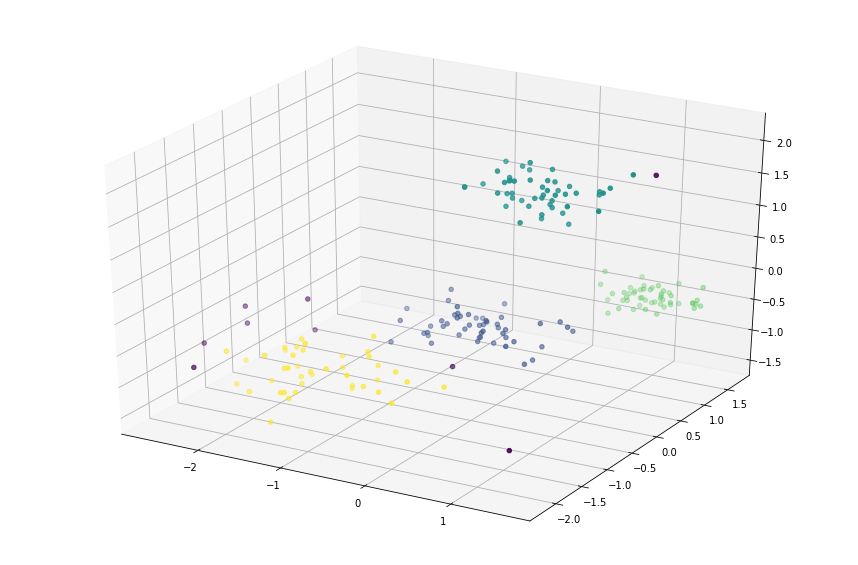

In [13]:
# import the plotting library fot 3d plots
from mpl_toolkits.mplot3d import Axes3D

# create a fig and add to the axes
fig = plt.figure(figsize=[15,10])
ax = fig.add_subplot(111, projection='3d')

ax.scatter(sample_scaled[:,0],sample_scaled[:,1],sample_scaled[:,2], c=cluster_labels)

In [15]:
# import all model performance measurement libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# set predicted values to cluster labels
pred_val = cluster_labels

true_val = cluster['Cluster label'].values.astype(int)

# compute the f1 score
f1_sc = f1_score(true_val, pred_val, average='micro')
print(f1_sc)
# help(f1_score)

0.955


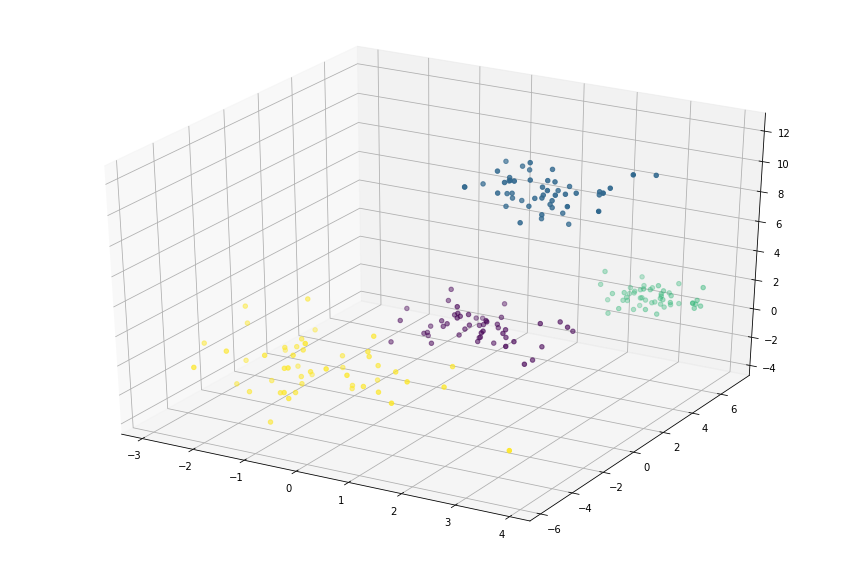

In [16]:
# display the clustering using the original cluster labels
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=[15,10])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cluster.X, cluster.Y, cluster.Z, c=cluster['Cluster label'])

In [17]:
print(confusion_matrix(true_val, pred_val))

[[ 0  0  0  0  0]
 [ 0 50  0  0  0]
 [ 1  0 49  0  0]
 [ 0  0  0 50  0]
 [ 8  0  0  0 42]]


#### It can be deduced from the confusion matrix that:
- There is noise in the clustering and this is a typical characteristic of the DBSCAN algorithm.
- along the diagonal we have all true positives, i.e the clusters data points that were correctly predicted, 
- this accounts sfor the high f1 score.